# Plot contingency table results for single events and on maps


Plot skill metrics and contingency table results for single events on maps (Figures 3 and 4). Note that this notebook uses netcdf files instead of Climada exposures (available upon request from raphael.portmann@agroscope.admin.ch) 

In [1]:
import sys
from pathlib import Path
#add path to path of current skript, where also utility.py lies
sys.path.append(Path.cwd().absolute())
#own utility functions
from utility import data_dir,read_at_centroid_data,plot_measures_per_event, plot_CH_map

#others
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import pickle
import matplotlib.pyplot as plt


/home/raphael/miniforge3/envs/climada_env_3.9/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


Specify details of the plot (Croptype, variable, resolutions etc) and directories

In [9]:
#%% SETUP
croptype='wheat'
variable='MESHS'
varname='MZC'
dates=['2019-06-15','2021-06-28','2021-07-12'] #used for wheat in paper
#dates=['2019-06-15','2021-06-28','2021-07-24'] #used for grapevine
resolutions=['1km','8km']

#minimum threshold (1 means at least one field required within grid cell)
thresh=1

# Directories
datadir = f"{data_dir}/data_at_centroid/"
figdir = '/home/raphael/scClim/climada/fig/'
hazard_filedir =f"{data_dir}/MESHS_netcdf/"

In [3]:
data_dir

'/home/raphael/scClim/climada/scClim/subproj_D/papers/NHESS/code_and_data/data/'

Read hazard data from netcdf as xarray

In [4]:
### Read hazard data
#get start and end year
startyear=int(min([pd.Timestamp(d).year for d in dates]))
endyear=int(max([pd.Timestamp(d).year for d in dates]))
#hazard filenames
filenames={}
haz_xarray={}
filenames={}
for res in resolutions:
    filenames[res] = f'{hazard_filedir}MZC_12_events_2017_2021_max_{res}.nc'
    haz_xarray[res] = xr.open_dataset(filenames[res]) # extent=[5.5,10.5,45.5,48])   

Read at centroid data for contingency table results

In [12]:
#read at centroid data 
at_centroid_data, croptype = read_at_centroid_data(datadir,[croptype],variable=variable)

Read damage and exposure data from netcdf file

In [11]:
#read damage/exposure data
damages_exposure_data={}
filenames_dmg={}
for res in resolutions:
    if croptype=='grapevine':
        name='Reben'
    elif croptype=='wheat':
        name='Weizen'
    filenames_dmg[res]=f"{data_dir}/damage_exposure_netcdf/damage_claims_SHV_{name}_gridded_{res}.nc"
    damages_exposure_data[res]=xr.open_dataset(filenames_dmg[res]) # extent=[5.5,10.5,45.5,48])

Plot Figure

/home/raphael/climada_papers/202403_crop_hail_damage_footprint/utility.py:1184: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  npred=np.int64(np.sum(A[1::]+B[1::]).values[0])
/home/raphael/miniforge3/envs/climada_env_3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/raphael/climada_papers/202403_crop_hail_damage_footprint/utility.py:1184: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  n

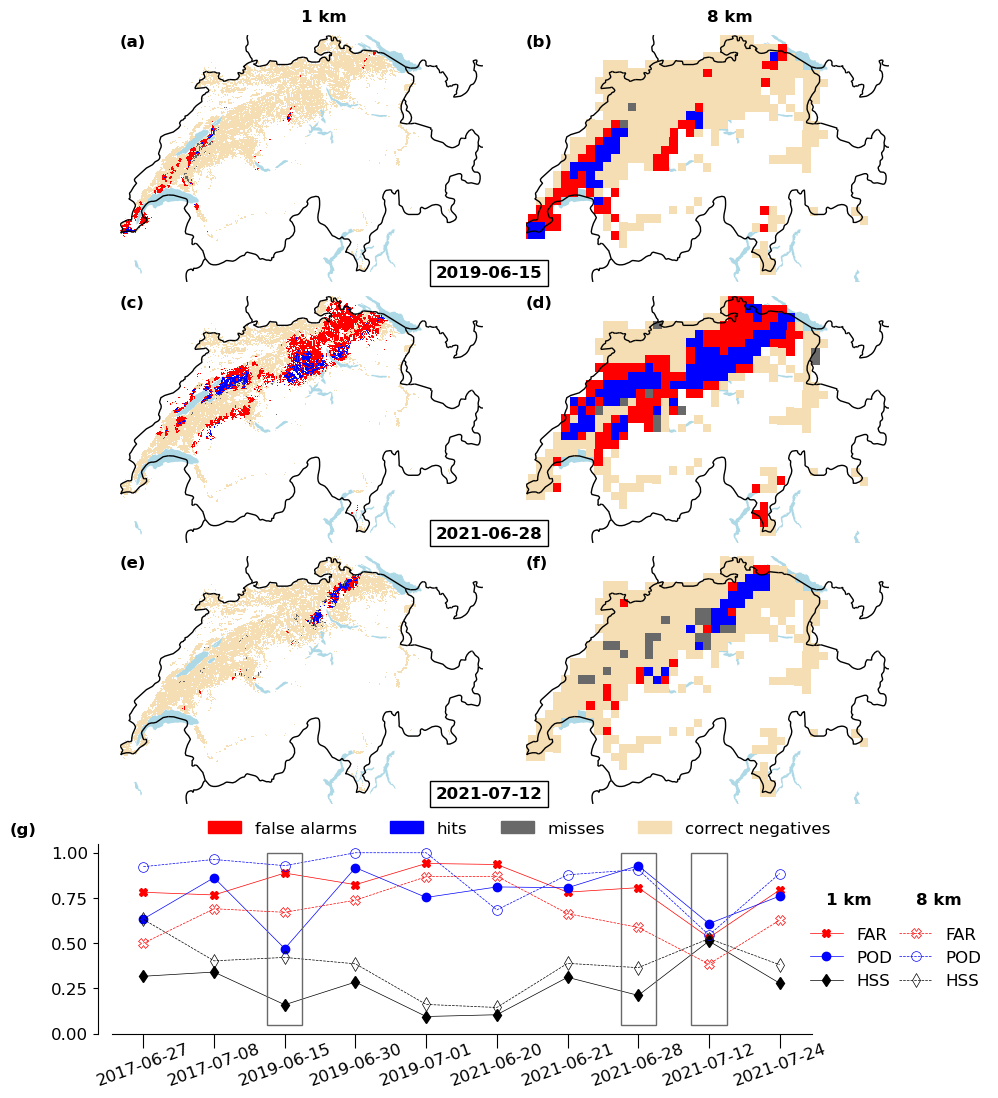

In [13]:
#setup
fontsize=12
labels=['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
names=['false alarms','hits','misses','correct negatives']
matplotlib.rcParams.update({'font.size': fontsize,'axes.labelsize': fontsize,'axes.edgecolor': 'none'})
res_name=['1 km', '8 km']
#cmap
colors=['red','blue','dimgrey','wheat']
cMap = matplotlib.colors.ListedColormap(colors)
# create a patch (proxy artist) for every color to use in legend
import matplotlib.patches as mpatches
patches = [ mpatches.Patch(color=colors[j], label=names[j]) for j in range(len(names))]


# Plot Figure
fig,axs,exts=plot_CH_map(nrows=3,ncols=2, figsize=(10,10), 
                            stamen_map=False, 
                            proj=ccrs.PlateCarree(),
                            pads=[0,0,0.1,0],
                            edgecolor='white')
                            #pads=[0.1,0.1,0.3,0.1],

#adjust white space between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.05)

#loop over dates and resolutons and data on map (panels a-f)
for i,date in enumerate(dates):

    for j,res in enumerate(resolutions):
        ax=axs[i*2+j]

        #plot row labels (dates)
        if j==1:
            if i==0:
                ax.text(-0.1,0.02,dates[i], ha='center', bbox=dict(facecolor='w'), transform=ax.transAxes,fontweight='bold',zorder=10)
            if i==1:
                ax.text(-0.1,0.02,dates[i], ha='center', bbox=dict(facecolor='w'), transform=ax.transAxes,fontweight='bold',zorder=10)
            if i==2:
                ax.text(-0.1,0.02,dates[i], ha='center', bbox=dict(facecolor='w'), transform=ax.transAxes,fontweight='bold',zorder=10)
        
        #plot panel labels
        if i==0:
            ax.text(0,0.95,labels[i*2+j], transform=ax.transAxes,fontweight='bold')
        if i==1:
            ax.text(0,0.95,labels[i*2+j], transform=ax.transAxes,fontweight='bold')
        if i==2:
            ax.text(0,0.95,labels[i*2+j], transform=ax.transAxes,fontweight='bold')                                
        
        #plot column labels
        if i==0:
            ax.text(0.5,1.05,res_name[j], transform=ax.transAxes,fontweight='bold')                                
  
        #get lonlat, hazard and damage data
        lon=haz_xarray[res].lon.values[0,:,:]
        lat=haz_xarray[res].lat.values[0,:,:]
        hazard_data=haz_xarray[res].sel(time=date)[varname]
        dmg_data=damages_exposure_data[res].sel(time=date)['n_fields_dmg']
    
        #prepare binary data
        predictions = np.where((hazard_data.values>0) & (damages_exposure_data[res]['n_fields_exp'].values>=thresh),1,0)
        damages=xr.where(dmg_data>0,2,0).values
        misses=np.where((hazard_data.fillna(0).values==0) & (dmg_data.values>0),3,0)
        correct_negatives=np.where((damages==0) & (predictions==0) & (damages_exposure_data[res]['n_fields_exp'].values>=thresh),4,0)
    
        #prepare data for plotting
        data = np.max([predictions,damages,misses,correct_negatives],axis=0)
        data = np.ma.masked_where(data == 0, data)

        #plot
        hs=ax.pcolormesh(lon,lat,data,
                         transform=ccrs.PlateCarree(),
                         cmap=cMap) #label='false alarms')
    
        if i>0:
            ax.set_facecolor('none')
  
        if i==2 and j==0:
            ax.legend(handles=patches,ncol=4,loc='center',bbox_to_anchor=(1.1, -0.1),edgecolor='none',facecolor='w',framealpha=1)    
            l=ax.get_legend()
            l.set_zorder(10)

#reset axes edgecolor from none to 'k'ArithmeticError
matplotlib.rcParams.update({'font.size': fontsize,'axes.edgecolor': 'k'})

#create additonal axes for time series plot
ax2=fig.add_axes([0.12,-0.12,0.7,0.19])
ax2.text(-0.145,1.05,labels[6], transform=ax2.transAxes,fontsize=fontsize,fontweight='bold')

#plot measures per event (panel g)
handles,labs,ax2,dates_all,npred_per_date,df_all_dates=\
    plot_measures_per_event(at_centroid_data,
                            variable,
                            ax2,
                            measures=['FAR','POD','HSS'],
                            thresh=thresh,
                            fontsize=fontsize)

#format axis
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=20,fontsize=fontsize)
ax2.spines[['left']].set_position(('outward', 10))
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_ylim([0,1.05])

#add legend
leg=ax2.legend(handles=handles,labels=labs,ncol=2,loc='center',bbox_to_anchor=(1.12,0.4),edgecolor='none',facecolor='none',columnspacing=0.4)
leg._legend_box.align = "left"
ax2.text(1.02,0.68,'1 km', transform=ax2.transAxes,fontsize=fontsize,fontweight='bold')
ax2.text(1.15,0.68,'8 km', transform=ax2.transAxes,fontsize=fontsize,fontweight='bold')

#add black boxes for dates shown in panels a-f
for i,date in enumerate(dates):
    ind= dates_all.index(pd.Timestamp(date))
    x0=ax2.get_xticks()[ind]-0.25
    rectangle = mpatches.Rectangle((x0, 0.05), 0.5, 0.95, edgecolor='dimgrey',
    facecolor="none", linewidth=1,zorder=10)
    ax2.add_patch(rectangle)

#mark dates with very low number of predictions with grey hatched boxes 
for i,date in enumerate(dates_all):
    if npred_per_date['1km'][i]<80:
        x0=ax2.get_xticks()[i]-0.25
        rectangle = mpatches.Rectangle((x0, 0.05), 0.5, 0.95, edgecolor='dimgrey',
        facecolor="none", hatch='//',linewidth=1,zorder=0,alpha=0.2)
        ax2.add_patch(rectangle)   
ax2.tick_params('x', length=10,pad=-5)

Now save figure

In [14]:
fig.savefig(f'{figdir}/Figure_04_{croptype}_{resolutions[0]}_{resolutions[1]}_{thresh}.pdf',dpi=100,bbox_inches='tight')
fig.savefig(f'{figdir}/Figure_04_{croptype}_{resolutions[0]}_{resolutions[1]}_{thresh}.png',dpi=100,bbox_inches='tight')
